<a href="https://colab.research.google.com/github/AshishGusain17/via_google_colab/blob/master/original_grocery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
# from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [0]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
beans = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/BEANS'
cake = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/CAKE'
candy = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/CANDY'
cereal = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/CEREAL'
chips = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/CHIPS'
chocolate = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/CHOCOLATE'
coffee = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/COFFEE'
corn = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/CORN'
fish = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/FISH'
flour = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/FLOUR'
honey = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/HONEY'
jam = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/JAM'
juice = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/JUICE'
milk = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/MILK'
nuts = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/NUTS'
oil = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/OIL'
pasta = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/PASTA'
rice = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/RICE'
soda = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/SODA'
spices = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/SPICES'
sugar = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/SUGAR'
tea = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/TEA'
tomato_sauce = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/TOMATO_SAUCE'
vinegar = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/VINEGAR'
water = '/content/drive/My Drive/jupyter_notebook/Grocery-Product-Classification-master/WATER'

X = []
Z = []
imgsize = 150

In [0]:
training_data('beans',beans)
training_data('cake',cake)
training_data('candy',candy)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('fish',fish)
training_data('flour',flour)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('milk',milk)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('psata',pasta)
training_data('rice',rice)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)


FileNotFoundError: ignored

In [0]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,25)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape

ValueError: ignored

In [0]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

NameError: ignored

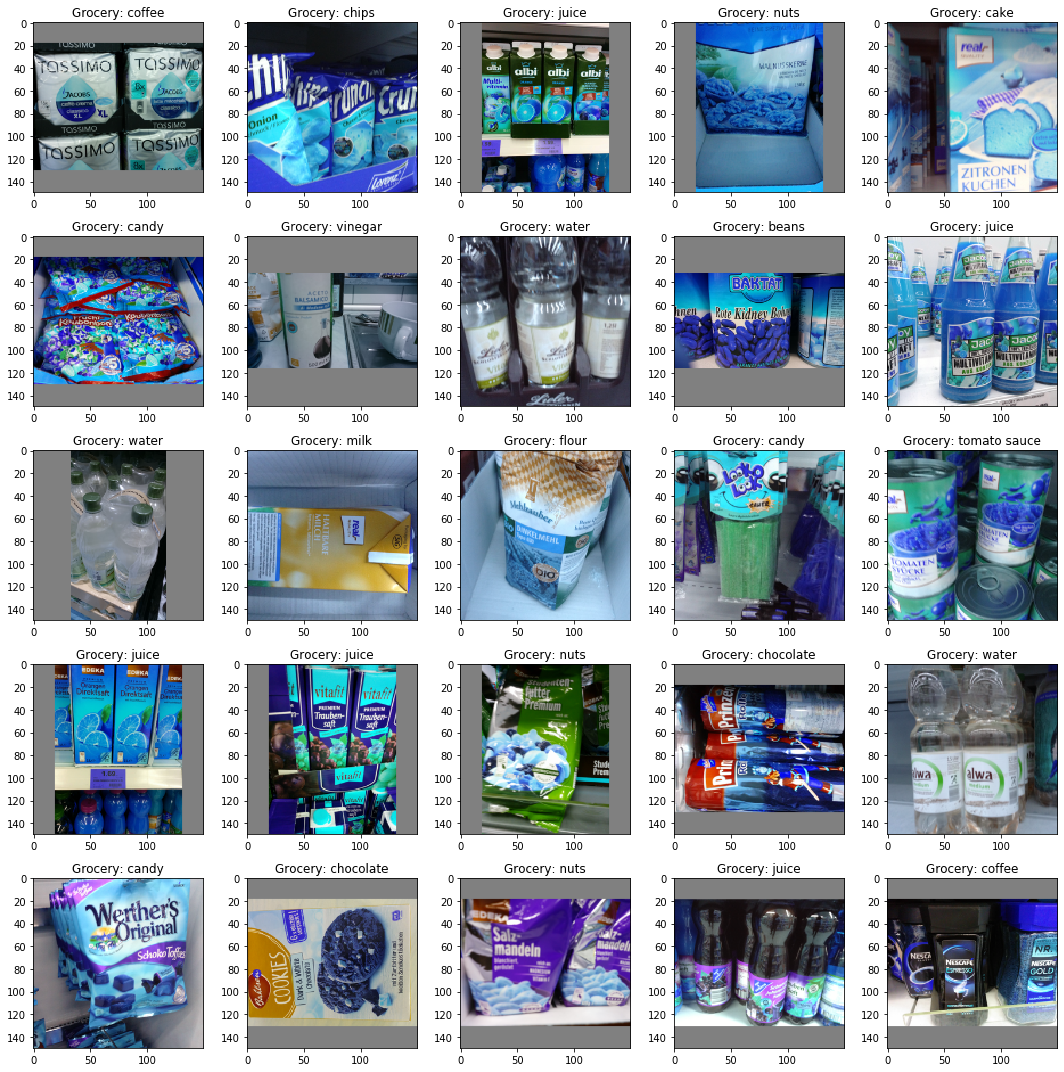

In [0]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Grocery: '+Z[l])
        
plt.tight_layout()

<keras.engine.input_layer.InputLayer object at 0x7fc528f3ae10> True
<keras.layers.convolutional.Conv2D object at 0x7fc528f3af28> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e7b0f0> True
<keras.layers.pooling.MaxPooling2D object at 0x7fc528e7a630> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e7f630> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e837b8> True
<keras.layers.pooling.MaxPooling2D object at 0x7fc528e896d8> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e10f60> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e17d68> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e1ec50> True
<keras.layers.pooling.MaxPooling2D object at 0x7fc528e2a438> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e31ba8> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e38c88> True
<keras.layers.convolutional.Conv2D object at 0x7fc528e3d8d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7fc528dcc358> True
<keras.l

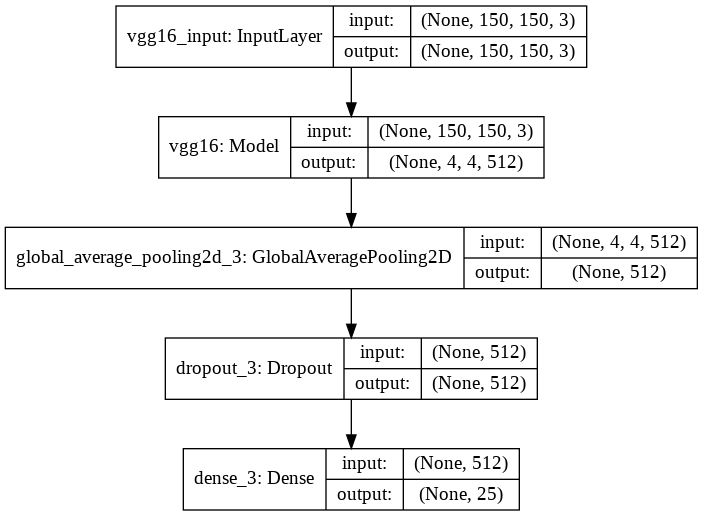

In [0]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = True
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(25,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [0]:

opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-3)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt1,
    metrics=['accuracy']
)

history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    validation_steps = 100,
    steps_per_epoch  = 100,
    epochs = 50, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/50
100/100 [==============================] - 171s 2s/step - loss: 3.3138 - acc: 0.0615 - val_loss: 3.1472 - val_acc: 0.0757

Epoch 00001: val_acc improved from -inf to 0.07568, saving model to ./base.model
Epoch 2/50
100/100 [==============================] - 156s 2s/step - loss: 3.1691 - acc: 0.0722 - val_loss: 3.1536 - val_acc: 0.0757

Epoch 00002: val_acc did not improve from 0.07568
Epoch 3/50
 47/100 [=============>................] - ETA: 1:20 - loss: 3.1686 - acc: 0.0727

Weights Saved


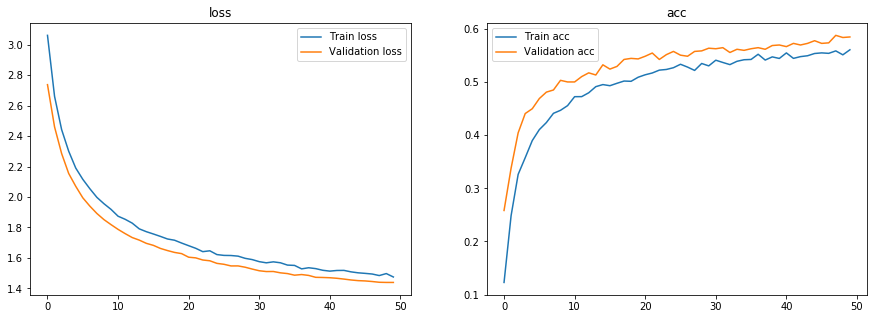

In [0]:
show_final_history(history)
model.load_weights('./base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

In [0]:
model.evaluate(x_test,y_test)

991/991 [==============================] - 5s 5ms/step


[1.4397278623552063, 0.5882946512051956]

In [0]:
model.evaluate(x_train,y_train)

3960/3960 [==============================] - 19s 5ms/step


[1.1465505602383854, 0.6853535354739487]